# TelegramStats

Today I'm going to analyze my **telegram conversations** with my girlfriend. For collecting your own data you have to go to the chat that you want to analyze, then click on the option panel and finally click on *export chat history*! For obvious reasons I won't insert the JSON file, but you can use yours with the previous explanation. <br /> <br />

This time I won't ask any particular questions, but I'll go trough the analysis as I feel. So, let's begin! Firsty need to look something about the **JSON** file: 

In [ ]:
{
 "name": #chat_name,
 "type": "personal_chat",
 "id": #id,
 "messages": [
  {
   "id": #
   "type": #
   "date": #
   "from": #
   "from_id": #,
   "text": #
  },
     ...
 ]
}

My **telegram id** is "129347830", and my girlfriend is "923502798"

Sencondly, we have to add the **libraries** that we'll use soon

In [63]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

Thirdly, we have to create the **dataframe** by the **JSON** file

In [99]:
df = pd.read_json("ChatExport_2020-09-03/result.json")
df.head(1)

,name,type,id,messages
0,Elena,personal_chat,5218470094,"{'id': 193491, 'type': 'message', 'date': '201..."


We need just the "messages" column, so we can do as following

In [100]:
df = df["messages"]
df.head(3)

0    {'id': 193491, 'type': 'message', 'date': '201...
1    {'id': 193492, 'type': 'message', 'date': '201...
2    {'id': 193493, 'type': 'message', 'date': '201...
Name: messages, dtype: object

Since there are some records without "from_id" but with "action_id" (e.g. voice call) we have to handle the KeyErr with a try catch. When we find this kind of error we can just "continue" and skip this cycle. 

In [275]:
# I'm the first one and she's the second one
count_message = {"129347830" : 0, "923502798" : 0}

for i in range(0,df.size):
    try: 
        count_message[str(df[i]["from_id"])]+= 1
    except KeyError:
        continue

<BarContainer object of 2 artists>

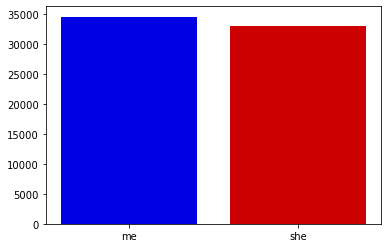

In [293]:
index = ["me", "she"]     
values = [count_message["129347830"],count_message["923502798"]]
plt.bar(index, values,color=["#0000E5","#CC0000"])